In [6]:
import os, sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = Path.cwd()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

os.chdir(PROJECT_ROOT)
sys.path.insert(0, str(PROJECT_ROOT))

from research.feature_engineering.data_loader import load_data
from research.feature_engineering.preprocess import add_mid_price
from research.feature_engineering.features import add_features
from research.feature_engineering.labels import add_label

df = load_data("data/raw/bank-nifty-1m-data.csv")
df = add_mid_price(df)
df = add_features(df)
df = add_label(df)
df = df.dropna()


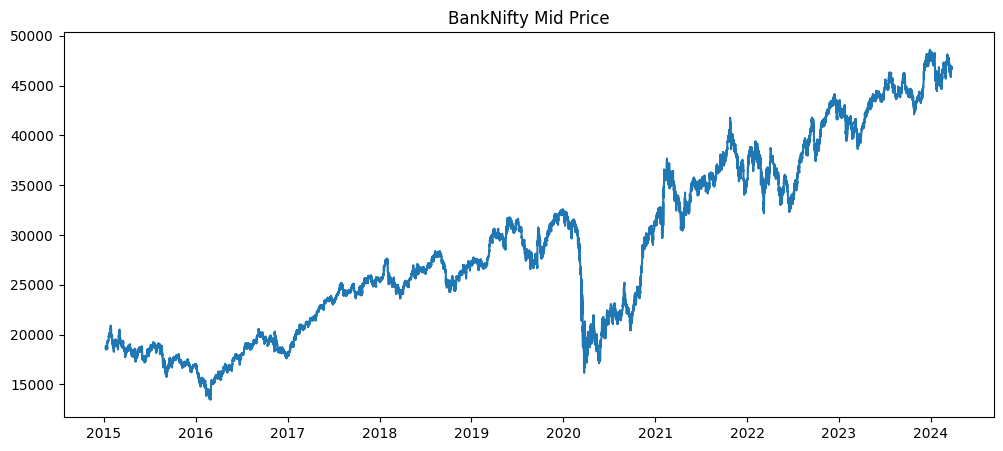

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['mid_price'])
plt.title("BankNifty Mid Price")
plt.show()


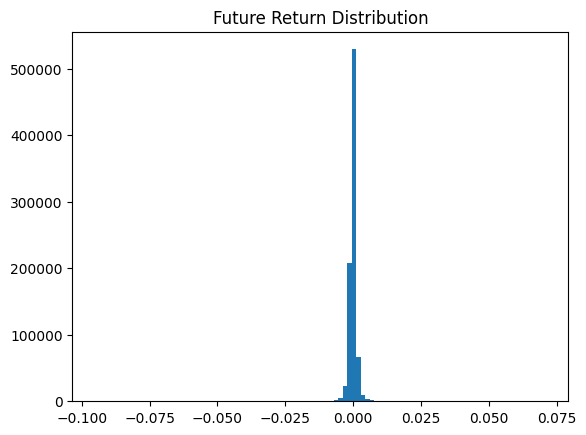

count    851357.000000
mean          0.000007
std           0.001585
min          -0.095138
25%          -0.000521
50%           0.000005
75%           0.000534
max           0.071006
Name: y, dtype: float64

In [8]:
plt.hist(df['y'], bins=100)
plt.title("Future Return Distribution")
plt.show()

df['y'].describe()


In [9]:
features = ['ret1','ret5','vol10','vol30','pressure','trend_ratio']
corr = df[features + ['y']].corr()['y']
print(corr)


ret1           0.062907
ret5           0.023729
vol10         -0.010343
vol30         -0.008618
pressure       0.188429
trend_ratio    0.011564
y              1.000000
Name: y, dtype: float64


In [10]:
df.groupby(pd.qcut(df['trend_ratio'], 5))['y'].mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_31584\2498967899.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['trend_ratio'], 5))['y'].mean()


trend_ratio
(0.9359000000000001, 0.9994]   -0.000008
(0.9994, 0.9998]                0.000008
(0.9998, 1.0002]                0.000007
(1.0002, 1.0007]                0.000007
(1.0007, 1.0444]                0.000019
Name: y, dtype: float64